#  Self-Study 6: Coupled Dynamics and Stability 2

In this self-study, we build upon the concepts explored in Self-Study 5. 
First you will apply the same concept studied in Self-Study 5 to a slightly different system.\
Feel free to use the code from the previous self-study as a starting point.
The important thing is that you understand what the code is doing and remember the concepts for the exam.

What is new in this exercise is that you will be asked to extend an existing model, shortly describe what you did, and interpret the results.\
I may ask you to present your model in class (3 min max), so be prepared to explain your extension.\
**Hint** Make use of interactive plots to make it easy to understand your findings.


## Section 1: Fixed Points and Phase Portrait with Cubic Terms

In this section, we will consider a more complex system of ODEs with **two coupled** variables, $x$ and $y$, and a cubic term:


$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - \epsilon y^3 - xy
$$

### Task 1: Find the Fixed Points Analytically (with `sympy`)

In [1]:
from sympy import symbols, Eq, solve # your import here

# Declare variables
x, y = symbols('x y')
alpha, beta, gamma, delta, epsilon = symbols('alpha beta gamma delta epsilon')

# Define the equations for dx/dt and dy/dt with a cubic term in dy/dt
dx_dt = alpha*x - beta * x**2 - gamma *x * y
dy_dt = delta * y - epsilon * y**3 - x * y

# Solve for fixed points (This may take a while, around 30 seconds)
fixed_points = solve((Eq(dx_dt, 0), Eq(dy_dt, 0)), (x,y))

fixed_points


[(0, 0),
 (0, -sqrt(delta/epsilon)),
 (0, sqrt(delta/epsilon)),
 (alpha/beta, 0),
 ((3*alpha*beta*epsilon*gamma - alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 + gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilon*(gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))),
  (gamma - sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(2*beta*epsilon)),
 ((3*alpha*beta*epsilon*gamma + alpha*beta*epsilon*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2) - 2*beta**2*delta*epsilon*gamma - gamma**3 - gamma**2*sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(beta**2*epsilon*(gamma + sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))),
  (gamma + sqrt(-4*alpha*beta*epsilon + 4*beta**2*delta*epsilon + gamma**2))/(2*beta*epsilon))]

### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


[(0, 0), (0, -1.4142135623731*sqrt(5)), (0, 1.4142135623731*sqrt(5)), (3, 0), (4.81665382639197, -0.605551275463989), (-16.8166538263920, 6.60555127546399)]


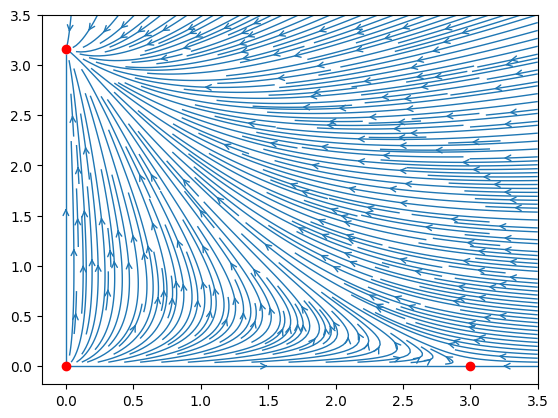

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical values for the fixed points for the symbolic solutions you found earlier.
# Set values for the parameters and use the `.subs()` method to substitute them into the symbolic solutions.

def lv_system(x, t, a, b, g, d, e):
    dx_dt = a*x[0] - b * x[0]**2 - g *x[0] * x[1]
    dy_dt = d * x[1] - e * x[1]**3 - x[0] * x[1]
    return [dx_dt, dy_dt]

alpha_val = 3
beta_val = 1
gamma_val = 3
delta_val = 5
epsilon_val = 1/2

substitution_dict = {alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val, epsilon: epsilon_val}

fixed_points_val = []
for p1, p2 in fixed_points:
    fixed_points_val.append((p1.subs(substitution_dict), p2.subs(substitution_dict)))
    # your code here
print(fixed_points_val)
# Step 2: Generate streamplot of the vector field defined by the equations above. **Hint:** Look at the matplotlib documentation for the `streamplot` function.
t = 0
X, Y = np.meshgrid(np.linspace(0, 3.5, 50), np.linspace(0, 3.5, 50))
U, V = lv_system([X,Y], t, alpha_val, beta_val, gamma_val, delta_val, epsilon_val)

# plotting code here, look at streamplot documentation or try `plt.streamplot?`
plt.streamplot(X, Y, U, V, linewidth=1, arrowsize=1, arrowstyle='->', density=3)
x_vals = [fixed_points_val[i][0] for i in range(len(fixed_points_val)) if abs(fixed_points_val[i][0]) < 4 and fixed_points_val[i][1] >= 0]
y_vals = [fixed_points_val[i][1] for i in range(len(fixed_points_val)) if abs(fixed_points_val[i][0]) < 4 and fixed_points_val[i][1] >= 0]
plt.plot(x_vals, y_vals, 'ro')
plt.show()
# Step 3: Overlay fixed points onto the streamplot, NOTE: only points that are positive




### Task 3: Stability of Fixed Points

In this section, we will examine the stability of the fixed points for our system.


First, let's define the Jacobian matrix of the system. The Jacobian matrix $J$ is given by:

$$
J = \begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$$

You can use `sympy` to find these partial derivatives and construct the Jacobian matrix.

In [3]:
from sympy import diff, Matrix

# Define the differential equations or use the ones you defined earlier

# Define the Jacobian matrix
J = Matrix([[diff(dx_dt, x), diff(dx_dt, y)], [diff(dy_dt, x), diff(dy_dt, y)]])
J

Matrix([
[alpha - 2*beta*x - gamma*y,                   -gamma*x],
[                        -y, delta - 3*epsilon*y**2 - x]])

### Task 4: Explore the stability of the Fixed Point

After obtaining the Jacobian matrix describing the stability of the fixed point.

**Only consider the fixed points that are positive.**

In [4]:
# your code here
from sympy import Subs


positive_fixed_points = [point for point in fixed_points_val if point[0] >=0 and point[1] >= 0]

eigenvalues = list(J.eigenvals().keys())
evaluated_eigenvalues =[Subs(eigenvalues[i], [alpha, beta, gamma, delta, epsilon], [alpha_val, beta_val, gamma_val, delta_val, epsilon_val]).doit() for i in range(len(eigenvalues))]
eigenvalues_fixed_points = {}
for point in positive_fixed_points:
    for eigenvalue in evaluated_eigenvalues:
        eigenvalues_fixed_points[str(point)] = [Subs(eigenvalue, (x,y), point).doit() for i in range(len(evaluated_eigenvalues))]
        
print(eigenvalues_fixed_points)

{'(0, 0)': [5, 5], '(0, 1.4142135623731*sqrt(5))': [-2.12132034355964*sqrt(5) - 3.5 + sqrt(3)*sqrt(21.5833333333333 - 9.19238815542512*sqrt(5)), -2.12132034355964*sqrt(5) - 3.5 + sqrt(3)*sqrt(21.5833333333333 - 9.19238815542512*sqrt(5))], '(3, 0)': [2, 2]}


## Section 3: Write up your findings

- A short report of max 300 words (you can do more, but the point is to be concise).
- Make use of interactive plots to illustrate your findings.
- What are the implications of your findings?

**NOTE:** I will ask a some students to present this section in class. You can volunteer if you want. :)

## Section 2: Your Own Model

To review the content covered in SS5 we will we will again consider a simple model system of ODEs and explore its stability.
This time, however, you will propose your own model and explore it.

I may ask you to present your short report (Section 3) in class, make a few interactive plots and think about an intuitive explanation for the dynamics.


##### Original Model
1. **Resource (r)**: Represents a natural resource that grow at a constant rate $a$, e.g., grain.
2. **Producers (y)**: Companies consume the resource to produce output $y$, at an operational cost of $c$, e.g., labor costs.
3. **Production**: The resource is consumed at a rate $k$ — proportional to both current production $y$ and available resources $r$.


The model is described by the following differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r -c y
$$

### Task 1: Propose an Extension to the Model
Think about additional factors that could be relevant be added.
Change the equations above, or come up with your own completely new model, and explain your reasoning.